<a href="https://colab.research.google.com/github/renanpyd/INVESTMENTS/blob/main/PrevisaoPrecoAcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 33.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install fbprophet

In [14]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [15]:
data = yf.download('MGLU3.SA', start = '2022-03-01', end = datetime.datetime.today())

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-02,5.95,6.34,5.94,6.31,6.31,101490000
2022-03-03,6.33,6.48,6.15,6.31,6.31,102314000
2022-03-04,6.29,6.41,6.11,6.29,6.29,87715200
2022-03-07,6.22,6.34,5.80,5.85,5.85,87037200
2022-03-08,6.05,6.25,5.75,6.05,6.05,147315700
2022-03-09,6.23,6.52,6.17,6.23,6.23,138833100
2022-03-10,6.15,6.16,5.82,5.96,5.96,141801900
2022-03-11,6.03,6.30,5.69,5.69,5.69,163946800
2022-03-14,5.86,5.89,5.30,5.33,5.33,131881600


In [16]:
df = pd.DataFrame()

In [17]:
df['y'] = data["Close"]

In [18]:
df['ds'] = data.index

In [19]:
df

,y,ds
Date,,
2022-03-02,6.31,2022-03-02
2022-03-03,6.31,2022-03-03
2022-03-04,6.29,2022-03-04
2022-03-07,5.85,2022-03-07
2022-03-08,6.05,2022-03-08
2022-03-09,6.23,2022-03-09
2022-03-10,5.96,2022-03-10
2022-03-11,5.69,2022-03-11
2022-03-14,5.33,2022-03-14


In [20]:
modelo = Prophet(daily_seasonality=True)

In [21]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


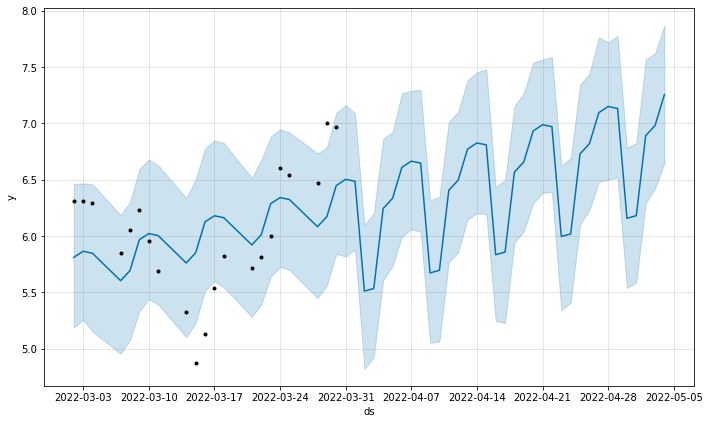

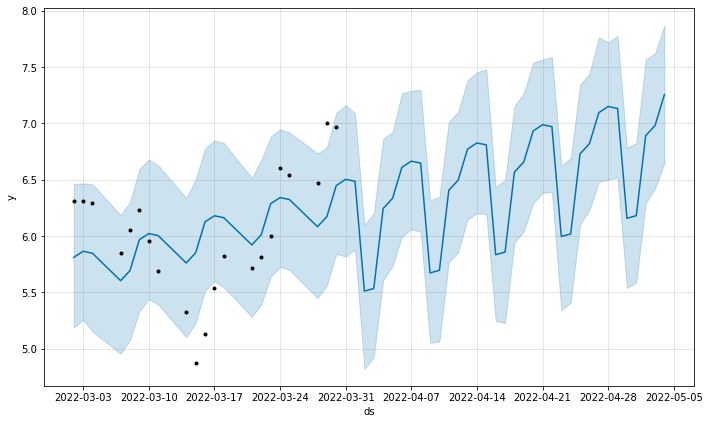

In [22]:
futuro = modelo.make_future_dataframe(periods = 35)
predictions = modelo.predict(futuro)
modelo.plot(predictions)

In [24]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
51,2022-04-30,1.673803,5.538804,6.783915,1.668875,1.678692,4.484204,4.484204,4.484204,5.124805,5.124805,5.124805,-0.640601,-0.640601,-0.640601,0.0,0.0,0.0,6.158007
52,2022-05-01,1.696892,5.588659,6.826112,1.691778,1.702097,4.484205,4.484205,4.484205,5.124805,5.124805,5.124805,-0.640600,-0.640600,-0.640600,0.0,0.0,0.0,6.181097
53,2022-05-02,1.719981,6.291758,7.567264,1.714676,1.725401,5.171407,5.171407,5.171407,5.124805,5.124805,5.124805,0.046602,0.046602,0.046602,0.0,0.0,0.0,6.891389
54,2022-05-03,1.743071,6.422202,7.622193,1.737487,1.748729,5.238632,5.238632,5.238632,5.124805,5.124805,5.124805,0.113827,0.113827,0.113827,0.0,0.0,0.0,6.981703
55,2022-05-04,1.766160,6.647573,7.870996,1.760261,1.772108,5.490572,5.490572,5.490572,5.124805,5.124805,5.124805,0.365767,0.365767,0.365767,0.0,0.0,0.0,7.256733
